In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import os
os.getcwd()

'/Users/zachwolpe/Desktop/µπ/Code + Projects/perceptual_attention_learning/reinforcement_learning'

In [17]:
submissions = pd.read_excel('/Users/zachwolpe/Desktop/curemed.xlsx')
submissions.head()

,Submission Date,Overall how is Curemed performing?,How would you compare Curemed with other service providers?,Please tell us why?,Which of the following two (2) Curemed value propositions (products) have you interacted with <strong>the most</strong> in the last 12 months?,Please rate your overall satisfaction with Short-term insurance >> Short-term insurance,Please rate your overall satisfaction with Medical aid >> Medical aid advice and implementation,Please rate your overall satisfaction with Mecial Aid with Gap cover >> Gap cover,Please rate your overall satisfaction with Financial planning >> Financial planning,Please rate your overall satisfaction with Investment planning >> Investment planning,...,Did you experience any dissatisfaction when dealing with Curemed in the last 6 months?,Please provide a brief description of your issue,What was your overall satisfaction with how we dealt with your issue?,Would you like us to contact you regarding this complaint?,Is there anything else you want us to know or work on?,CONSENT,Please enter your details here,Random winner,Unnamed: 180,Unnamed: 181
0,"Aug 21, 2024",5.0,5. The best in the market,"With everything i need, i get feedback asap, w...",Medical aid\nMedical aid with Gap cover,NaN,Excellent,Excellent,NaN,NaN,...,NO,NaN,NaN,NaN,No,"Yes, I give consent","Kim Barker, kimalbarker@gmail.com",318,0.942309,NaN
1,"Aug 19, 2024",5.0,2. Better than some other providers,good customer service,Medical aid\nMedical aid with Gap cover,NaN,Very Good,Very Good,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,"Yes, I give consent",NaN,751,0.774288,NaN
2,"Aug 19, 2024",5.0,4. Better than most others,Affordable and reliable,Medical aid,NaN,Excellent,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,all good,"Yes, I give consent",NaN,792,0.235163,NaN
3,"Aug 20, 2024",4.0,3. The same as others,I regret taking up this medical Aid . I am sho...,Medical aid,NaN,Fair,NaN,NaN,NaN,...,YES,I went to the dentist and I had to pay cash ca...,1,NO,not at all . I am shopping around for another ...,"No, I would like to remain anonymous","Madelein Seagars , madiseagars98@gmail.com",378,0.060357,NaN
4,"Aug 19, 2024",5.0,5. The best in the market,Handles any query or change requirements profe...,Medical aid\nMedical aid with Gap cover,NaN,Excellent,Excellent,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,"Yes, I give consent",NaN,820,0.567997,NaN


In [29]:
[c for c in submissions.columns]

['Submission Date',
 'Overall how is Curemed performing?',
 'How would you compare Curemed with other service providers?',
 'Please tell us why?',
 'Which of the following two (2) Curemed value propositions (products) have you interacted with <strong>the most</strong> in the last 12 months?',
 'Please rate your overall satisfaction with Short-term insurance >> Short-term insurance',
 'Please rate your overall satisfaction with Medical aid >> Medical aid advice and implementation',
 'Please rate your overall satisfaction with Mecial Aid with Gap cover >> Gap cover',
 'Please rate your overall satisfaction with Financial planning >> Financial planning',
 'Please rate your overall satisfaction with Investment planning >> Investment planning',
 'Please rate your overall satisfaction with Life cover planning >> Life cover planning',
 'Please rate your overall satisfaction with Employee benefits planning >> Employee benefits planning',
 'Please rate Short-term insurance on the following attr

In [33]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [49]:
x = submissions['Please tell us why?'][:10].apply(lambda x: pipe.predict(x))

In [58]:
x[7][0]['score']

0.41240638494491577

In [32]:
submissions['Please rate Short-term Service Team on the following attributes >> Speed of processing the request'].unique()

array([nan, 'Excellent', 'Very Good', 'Good'], dtype=object)

<Axes: >

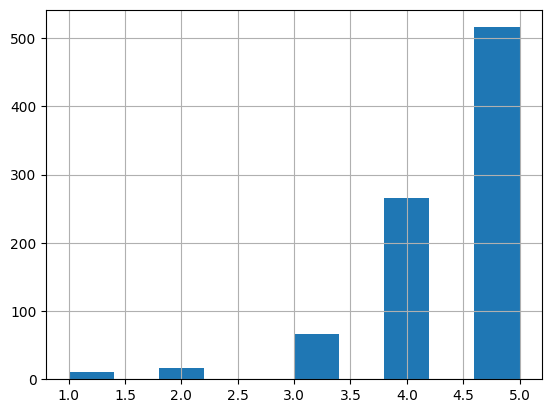

In [20]:
submissions['Overall how is Curemed performing?'].hist()

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = submissions['Which of the following two (2) Curemed value propositions (products) have you interacted with <strong>the most</strong> in the last 12 months?'].values

text = ' '.join(str(item) for item in text if isinstance(item, str))


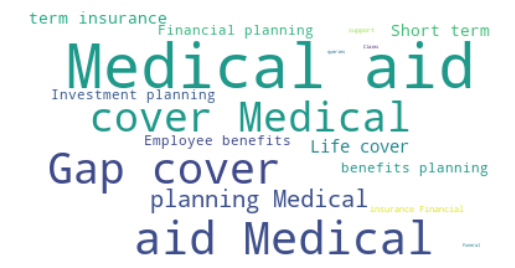

In [27]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()